# Extracting Sock Data ~ Python Project

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098485  0.098913  0.098485  0.098485  469033600   
1980-12-15 00:00:00-05:00  0.093775  0.093775  0.093347  0.093347  175884800   
1980-12-16 00:00:00-05:00  0.086924  0.086924  0.086495  0.086495  105728000   
1980-12-17 00:00:00-05:00  0.088636  0.089064  0.088636  0.088636   86441600   
1980-12-18 00:00:00-05:00  0.091206  0.091634  0.091206  0.091206   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


<Axes: xlabel='Date'>

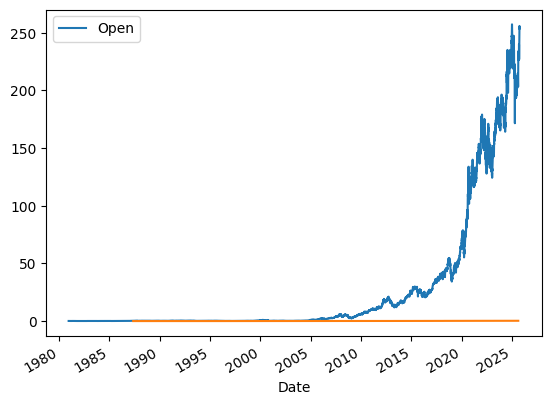

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib as mpl

# Test yf.Ticker
apple = yf.Ticker('AAPL')
apple_share_price_data = apple.history(period="max")
# print(apple_share_price_data.shape)
print(apple_share_price_data.head())
# print(apple_share_price_data.tail())
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.plot(x='Date', y='Open')
apple.dividends.plot()


In [2]:
import sys

sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

filename = 'apple.json'
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json'
download_file(url, filename)
df = pd.read_csv(filename, header=None)



file download successfully to apple.json


In [3]:
# JSON object ticker
import json

filename = 'apple.json'
with open(filename) as f:
    apple_info = json.load(f)


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ticker class

class financeBro(object):
    def __init__(self, symbol):
        self.symbol = symbol
        try:
            self.ticker = yf.Ticker(symbol)
        except (ValueError, KeyError) as e:
            print('Invalid Symbol', symbol)
        self.history = self.ticker.history(period='max')
            
    def plot_history(self):
        pass



amd = financeBro('AMD')
for key in ['website', 'country', 'sector', 'industry']:
    print(key, '~', amd.ticker.info[key])
print(amd.history.sort_values(by='Date').head(1))



website ~ https://www.amd.com
country ~ United States
sector ~ Technology
industry ~ Semiconductors
                            Open      High    Low     Close  Volume  \
Date                                                                  
1980-03-17 00:00:00-05:00  3.125  3.302083  3.125  3.145833  219600   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


class scrapeFinanceBro(object):
    def __init__(self, url):
        self.url = url
        self.raw_html = None
        self.soup = None
        self.history_ingredients = None
        self.history_ingredients_full = []
        self.history_df = None
        self.download_html(url=self.url)
        self.make_soup(html=self.raw_html)

    def import_ingredients(self, ingredients):
        self.history_ingredients = ingredients
        self.extract_ingredients(ingredients=ingredients)

    def download_html(self, url):
        try:
            r = requests.get(url)
            if r.status_code == 200:
                self.raw_html = r.content
            else:
                print('Error accessing URL: HTTP Status Code', r.status_code)
        except Exception as e:
            print('Error accessing URL:', e)    

    def make_soup(self, html):
        try:
            self.soup = BeautifulSoup(html, 'html.parser')
            self.extract_ingredients(soup=self.soup, ingredients=self.history_ingredients)
        except Exception as e:
            print('Error processing HTML:', e)

    def extract_ingredients(self, soup, ingredients):
        for item in nflx.soup.find('table').find_all('th'):
            self.history_ingredients_full.append(item.text)
        if ingredients:
            headers = ingredients
        else:
            headers = self.history_ingredients_full
        rows = soup.find('tbody').find_all('tr')
        self.history_df = pd.DataFrame(index=range(len(rows)), columns=headers)
        for row_index, row in enumerate(rows):
            col = row.find_all('td')
            for index, key in enumerate(headers):
                self.history_df.loc[row_index, key] = col[index].text 

    def plot_history(self):
        pass



nflx_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html'
nflx = scrapeFinanceBro(nflx_url)
# print(nflx.history_df)

amzn_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'
amzn = scrapeFinanceBro(amzn_url)
print('Title:', amzn.soup.find('title').text)
print('Headers:', amzn.history_df.columns.to_list())
print(amzn.history_df.head())
print(amzn.history_df.tail())


Error processing HTML: name 'nflx' is not defined
Title: Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance
Headers: ['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
           Date      Open      High       Low    Close* Adj Close**  \
0  Jan 01, 2021  3,270.00  3,363.89  3,086.00  3,206.20    3,206.20   
1  Dec 01, 2020  3,188.50  3,350.65  3,072.82  3,256.93    3,256.93   
2  Nov 01, 2020  3,061.74  3,366.80  2,950.12  3,168.04    3,168.04   
3  Oct 01, 2020  3,208.00  3,496.24  3,019.00  3,036.15    3,036.15   
4  Sep 01, 2020  3,489.58  3,552.25  2,871.00  3,148.73    3,148.73   

        Volume  
0   71,528,900  
1   77,556,200  
2   90,810,500  
3  116,226,100  
4  115,899,300  
            Date    Open    High     Low  Close* Adj Close**       Volume
56  May 01, 2016  663.92  724.23  656.00  722.79      722.79   90,614,500
57  Apr 01, 2016  590.49  669.98  585.25  659.59      659.59   78,464,200
58  Mar 01, 2016  556.29  603.24  538.58  593